In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/google_stock_data.csv")

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4113,2020-12-18 00:00:00-05:00,87.112861,87.159046,85.426404,85.962234,80328000,0.0,0.0
4114,2020-12-21 00:00:00-05:00,85.093185,86.450898,84.372614,86.377396,36568000,0.0,0.0
4115,2020-12-22 00:00:00-05:00,86.132074,86.279813,85.046758,85.589294,18734000,0.0,0.0
4116,2020-12-23 00:00:00-05:00,85.818216,86.805456,85.665756,86.030266,20676000,0.0,0.0
4117,2020-12-24 00:00:00-05:00,86.160389,86.706654,85.867888,86.351578,6936000,0.0,0.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19 00:00:00-04:00,2.473736,2.574170,2.373798,2.482147,897427216,0.0,0.0
1,2004-08-20 00:00:00-04:00,2.498721,2.698351,2.486105,2.679304,458857488,0.0,0.0
2,2004-08-23 00:00:00-04:00,2.739663,2.807196,2.697610,2.706267,366857939,0.0,0.0
3,2004-08-24 00:00:00-04:00,2.751784,2.760689,2.562048,2.594207,306396159,0.0,0.0
4,2004-08-25 00:00:00-04:00,2.596433,2.671635,2.569717,2.622160,184645512,0.0,0.0


In [ ]:
# Extract "Date" and "Close" feature colums from the dataframe.
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2004-08-19 00:00:00-04:00,2.482147
1,2004-08-20 00:00:00-04:00,2.679304
2,2004-08-23 00:00:00-04:00,2.706267
3,2004-08-24 00:00:00-04:00,2.594207
4,2004-08-25 00:00:00-04:00,2.622160


In [ ]:
# Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4118 non-null   object 
 1   Close   4118 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.5+ KB


In [ ]:
df['Date'].min(), df['Date'].max()

('2004-08-19 00:00:00-04:00', '2020-12-24 00:00:00-05:00')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='Apple Inc. Stock Price 2004-2020')
fig.show()

In [ ]:
train = df.loc[df['Date'] <= '2017-12-24']
test = df.loc[df['Date'] > '2017-12-24']
train.shape, test.shape

((3362, 2), (756, 2))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4118 non-null   object 
 1   Close   4118 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.5+ KB


In [ ]:
df.head()

,Date,Close
0,2004-08-19 00:00:00-04:00,2.482147
1,2004-08-20 00:00:00-04:00,2.679304
2,2004-08-23 00:00:00-04:00,2.706267
3,2004-08-24 00:00:00-04:00,2.594207
4,2004-08-25 00:00:00-04:00,2.622160


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(np.array(train['Close']).reshape(-1,1))

train['Close'] = scaler.transform(np.array(train['Close']).reshape(-1,1))
test['Close'] = scaler.transform(np.array(test['Close']).reshape(-1,1))

/tmp/ipython-input-3901342107.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3901342107.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train

,Date,Close
0,2004-08-19 00:00:00-04:00,-1.446474
1,2004-08-20 00:00:00-04:00,-1.429590
2,2004-08-23 00:00:00-04:00,-1.427280
3,2004-08-24 00:00:00-04:00,-1.436877
4,2004-08-25 00:00:00-04:00,-1.434483
...,...,...
3357,2017-12-18 00:00:00-05:00,2.921815
3358,2017-12-19 00:00:00-05:00,2.894342
3359,2017-12-20 00:00:00-05:00,2.869973
3360,2017-12-21 00:00:00-05:00,2.864360


In [ ]:
test.tail(1200)

,Date,Close
3362,2017-12-26 00:00:00-05:00,2.835058
3363,2017-12-27 00:00:00-05:00,2.803715
3364,2017-12-28 00:00:00-05:00,2.798484
3365,2017-12-29 00:00:00-05:00,2.791084
3366,2018-01-02 00:00:00-05:00,2.870186
...,...,...
4113,2020-12-18 00:00:00-05:00,5.702589
4114,2020-12-21 00:00:00-05:00,5.738143
4115,2020-12-22 00:00:00-05:00,5.670651
4116,2020-12-23 00:00:00-05:00,5.708415


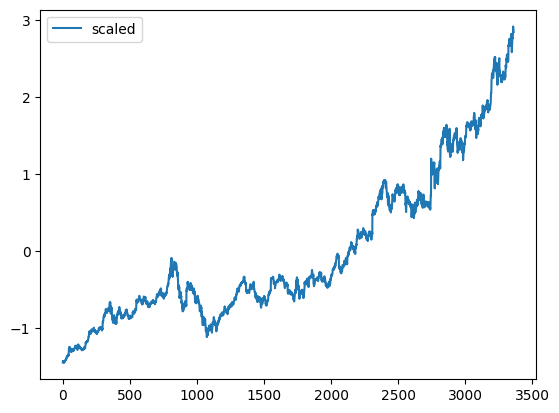

In [ ]:
# Visualize scaled data
plt.plot(train['Close'], label = 'scaled')
plt.legend()
plt.show()

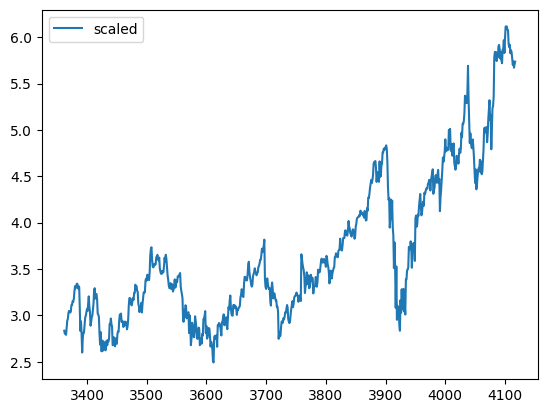

In [ ]:
# Visualize scaled data
plt.plot(test['Close'], label = 'scaled')
plt.legend()
plt.show()

In [ ]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])

    return np.array(X_out), np.array(y_out)

X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])
print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test.shape)
print("Testing input shape: ", y_test.shape)
print("Testing input shape: ", y_train.shape)
y_train[0]

Training input shape:  (3332, 30, 1)
Testing input shape:  (726, 30, 1)
Testing input shape:  (726,)
Testing input shape:  (3332,)


np.float64(-1.3781746044662562)

In [ ]:
X_train[0]

array([[-1.44647361],
       [-1.42958954],
       [-1.42728044],
       [-1.43687704],
       [-1.43448323],
       [-1.43043695],
       [-1.43416547],
       [-1.44293584],
       [-1.44217322],
       [-1.44666435],
       [-1.44399513],
       [-1.44717279],
       [-1.44384677],
       [-1.44232145],
       [-1.44230032],
       [-1.43590258],
       [-1.43130554],
       [-1.42285285],
       [-1.42177247],
       [-1.41759914],
       [-1.41014213],
       [-1.40618063],
       [-1.40940066],
       [-1.40825676],
       [-1.40308764],
       [-1.40518496],
       [-1.40851092],
       [-1.39029221],
       [-1.38135231],
       [-1.38448763]])

In [ ]:
y_train.shape

(3332,)

In [ ]:
# set seed to regenerate same sequence of random numbers.
np.random.seed(21)
tf.random.set_seed(21)

In [ ]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.2074 - val_loss: 0.1637
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0355 - val_loss: 0.0812
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0212 - val_loss: 0.0551
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0367 - val_loss: 0.1161
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187 - val_loss: 0.1086
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0124 - val_loss: 0.0244
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188 - val_loss: 0.0214
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0212 - val_loss: 0.0437
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0133 - val_loss: 0.0379
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185 - val_loss: 0.0184
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167 - val_loss: 0.0389
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss

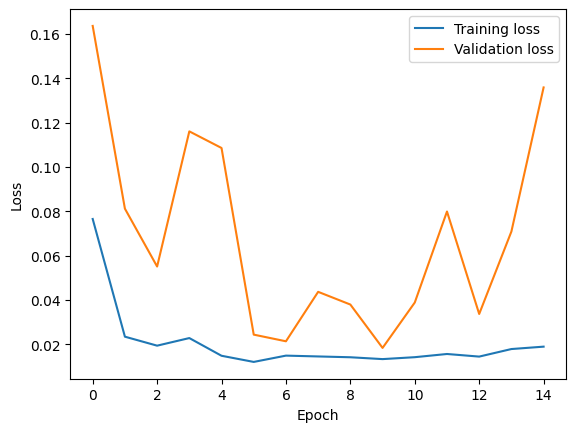

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Reconstruction error threshold: 0.5044953304633648


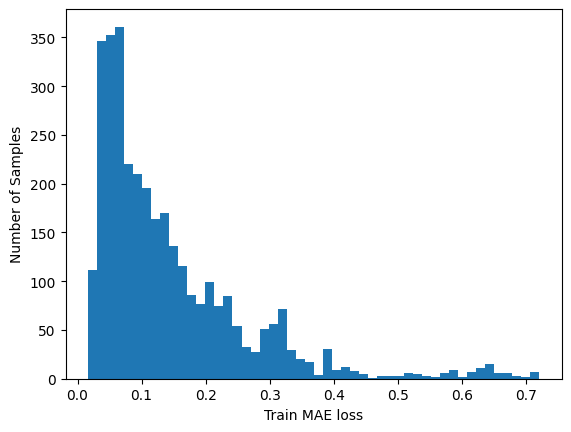

In [ ]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = np.max(train_mae_loss)*0.7

print('Reconstruction error threshold:',threshold)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Text(0, 0.5, 'Number of samples')

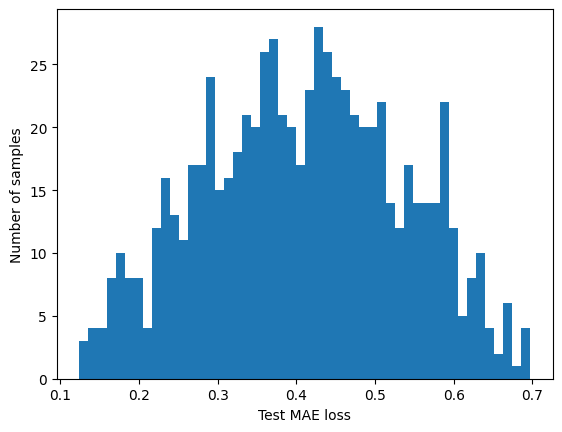

In [ ]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)*0.49

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [ ]:
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [ ]:
anomaly_df.tail()

,Date,Close,loss,threshold,anomaly
4113,2020-12-18 00:00:00-05:00,5.702589,0.404475,0.504495,False
4114,2020-12-21 00:00:00-05:00,5.738143,0.392421,0.504495,False
4115,2020-12-22 00:00:00-05:00,5.670651,0.385634,0.504495,False
4116,2020-12-23 00:00:00-05:00,5.708415,0.373669,0.504495,False
4117,2020-12-24 00:00:00-05:00,5.735932,0.369730,0.504495,False


In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [ ]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,Date,Close,loss,threshold,anomaly
3508,2018-07-26 00:00:00-04:00,3.734906,0.519378,0.504495,True
3509,2018-07-27 00:00:00-04:00,3.608045,0.544417,0.504495,True
3510,2018-07-30 00:00:00-04:00,3.528263,0.543599,0.504495,True
3511,2018-07-31 00:00:00-04:00,3.517717,0.528048,0.504495,True
3512,2018-08-01 00:00:00-04:00,3.529412,0.513613,0.504495,True


In [ ]:
anomalies.shape

(176, 5)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=anomaly_df['Date'],
    y=scaler.inverse_transform(anomaly_df[['Close']]).flatten(),
    mode='lines',
    name='Close price'
))

fig.add_trace(go.Scatter(
    x=anomalies['Date'],
    y=scaler.inverse_transform(anomalies[['Close']]).flatten(),
    mode='markers',
    marker=dict(color='red', size=8),
    name='Anomaly'
))

fig.update_layout(
    title='Detected anomalies',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True
)

fig.show()


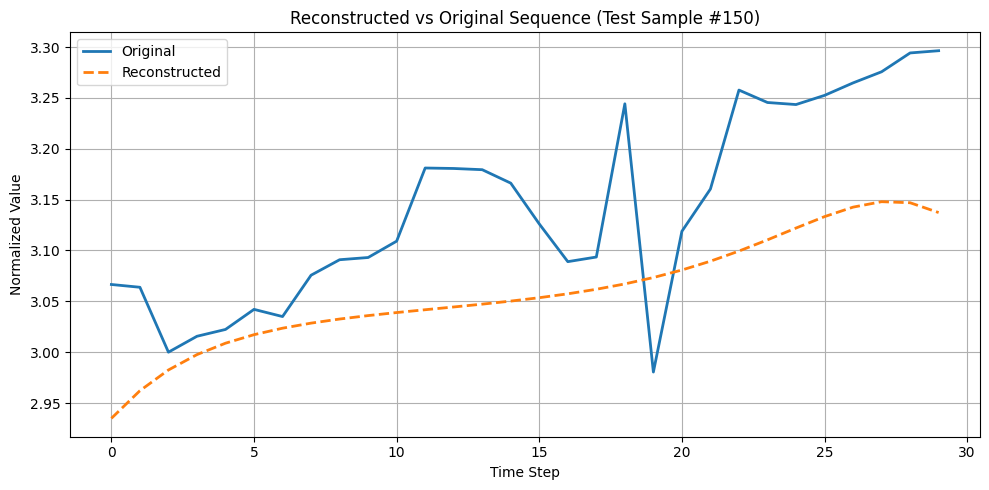